In [1]:
import csv
import sqlite3
import pandas as pd
import math
# Use svg backend for better quality
import matplotlib
matplotlib.use("svg")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

### Unix Area

In [2]:
!ls -l ../data 

total 409672
-rw-r--r--@ 1 rohansingh  staff    151999 Apr 16 21:47 Analysis_Tableau.twb
-rw-r--r--@ 1 rohansingh  staff     64517 Apr 16 22:30 Analysis_Tableau_AdCampaign.twb
-rw-r--r--@ 1 rohansingh  staff  81131198 Mar  9 08:49 FeedGrains.csv
-rw-r--r--  1 rohansingh  staff         0 Apr 12 01:01 FeedGrains.db
-rw-r--r--@ 1 rohansingh  staff   4773458 Apr 12 00:18 FeedGrains.zip
-rw-r--r--@ 1 rohansingh  staff     26615 May  9 17:55 corn_prices_by_state.csv
-rw-r--r--@ 1 rohansingh  staff     50546 May  6 19:21 death_nutrional_endocrine_by_state_year.txt
-rw-r--r--@ 1 rohansingh  staff     49268 May  6 18:34 death_rate_by_state_year.txt
-rw-r--r--@ 1 rohansingh  staff   1607687 May  6 18:16 death_rate_data_1999_2016.txt
-rw-r--r--  1 rohansingh  staff  79233024 Apr 12 00:28 feedgrain.db
-rw-r--r--@ 1 rohansingh  staff  20397291 May  9 13:46 nutrition_physical_activity_raw.csv
-rw-r--r--@ 1 rohansingh  staff  20397291 May  8 10:24 nutrition_physical_activity_raw.csv.backup
-rw-r--r--

### Config Variables

In [3]:
datadir = "../data/"
sqldb_grains = datadir + "feedgrain.db"

In [4]:
def connect_db(dbname=sqldb_grains):
    """ Returns a sqlite connection object.
    Inputs:
        dbname (str) : Name of the database to connect.
    Outputs:
        conn (sqlite connection object) : connection object for sqlite database.
    """
    conn = sqlite3.connect(dbname)
    conn.text_factory = str
    return conn

def get_cursor(conn):
    """ Returns a sqlite cursor object.
    Inputs:
        conn (sqlite connection object) : connection object for sqlite database.
    Outputs:
        cursor (sqlite cursor object) : cursor object for sqlite database.
    """
    return conn.cursor()

### Preliminary Data Exploration

In [5]:
conn = connect_db()
cursor = get_cursor(conn)

In [6]:
res = cursor.execute("PRAGMA table_info(grains);")
for row in res:
    print(row)

(0, 'SC_Group_ID', 'TEXT', 0, None, 0)
(1, 'SC_Group_Desc', 'TEXT', 0, None, 0)
(2, 'SC_GroupCommod_ID', 'TEXT', 0, None, 0)
(3, 'SC_GroupCommod_Desc', 'TEXT', 0, None, 0)
(4, 'SC_Geography_ID', 'TEXT', 0, None, 0)
(5, 'SortOrder', 'TEXT', 0, None, 0)
(6, 'SC_GeographyIndented_Desc', 'TEXT', 0, None, 0)
(7, 'SC_Commodity_ID', 'TEXT', 0, None, 0)
(8, 'SC_Commodity_Desc', 'TEXT', 0, None, 0)
(9, 'SC_Attribute_ID', 'TEXT', 0, None, 0)
(10, 'SC_Attribute_Desc', 'TEXT', 0, None, 0)
(11, 'SC_Unit_ID', 'TEXT', 0, None, 0)
(12, 'SC_Unit_Desc', 'TEXT', 0, None, 0)
(13, 'Year_ID', 'TEXT', 0, None, 0)
(14, 'SC_Frequency_ID', 'TEXT', 0, None, 0)
(15, 'SC_Frequency_Desc', 'TEXT', 0, None, 0)
(16, 'Timeperiod_ID', 'TEXT', 0, None, 0)
(17, 'Timeperiod_Desc', 'TEXT', 0, None, 0)
(18, 'Amount', 'TEXT', 0, None, 0)


In [14]:
def view_distinct(col):
    res = cursor.execute("select distinct {} from grains".format(col))
    for row in res:
        print(row)
view_distinct('SC_Commodity_Desc')

('Barley',)
('Barley products',)
('Oats',)
('Sorghum',)
('Corn',)
('Corn products',)
('Oats products',)
('Barley malting',)
('Barley grain',)
('Corn grain',)
('Oats grain',)
('Alcohol total',)
('Other barley',)
("Brewers' and distillers' dregs & waste",)
('Coarse grains',)
('White corn',)
('Feed grains',)
('Hay alfalfa (dry)',)
('All animals',)
('Energy feeds',)
('Soybean meal',)
('Sunflower meal',)
('Oilseed meals',)
('Meal and bone meal tankage',)
('Broiler-feed',)
('Rapeseed (canola) meal',)
('Peanut meal',)
('Milk products',)
('Fishmeal and solubles',)
('Corn gluten feed and meal',)
('Market egg-feed',)
('Hog-corn',)
('Milk-feed',)
('Barley feed',)
('Cottonseed meal',)
('Hay all (dry)',)
('Hay other (dry)',)
('Linseed meal',)
('Animal-protein feeds',)
('Steer and heifer-corn',)
('Rice millfeeds',)
('Fats and oils',)
('Wheat millfeeds',)
('Turkey-feed',)
('Line-haul railroads, all products',)
('Grain',)
('Corn, No. 2 yellow',)
('Wheat',)
('Dairy',)
('Corn meal, yellow',)
('Brewers g

In [16]:
def get_data(crop, group):
    query = """
             select * from grains where SC_Commodity_Desc = '{0}' 
             and SC_Group_Desc = '{1}'
            """.format(crop, group)
    print(query)
    res = cursor.execute(query)
    list_corn_exp_imp = []
    for row in res:
        list_corn_exp_imp.append(row)
        
    df = pd.DataFrame(list_corn_exp_imp)
    return df

In [17]:
df_corn_exp_imp = get_data('Oilseed meals', 'Exports and imports')
df_corn_exp_imp


             select * from grains where SC_Commodity_Desc = 'Oilseed meals' 
             and SC_Group_Desc = 'Exports and imports'
            


""


In [12]:
df_corn_exp_imp = df_corn_exp_imp[[6, 8, 10, 12, 13, 15, 17, 18]]

In [51]:
df_corn_exp_imp.columns = ['slno', 'destination', 'type','unit', 'year', 'frequency', 'month', 'amount']
df_corn_exp_imp
df_corn_exports = df_corn_exp_imp[df_corn_exp_imp['type']=="Exports, from U.S. to specified destination"]
df_corn_exports.loc[:,('amount')] = df_corn_exports.loc[:,('amount')].astype(float)
# df_corn_exp_imp['destination'].value_counts()

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [68]:
df_corn_exp_by_country_region = df_corn_exports.groupby('slno')['amount'].sum().reset_index()
df_corn_exp_by_country_region = df_corn_exp_by_country_region[df_corn_exp_by_country_region['slno'] != 'World']
df_corn_exp_by_country_region = df_corn_exp_by_country_region.sort_values(by='amount')
df_corn_exp_by_country_region = df_corn_exp_by_country_region[-20:]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

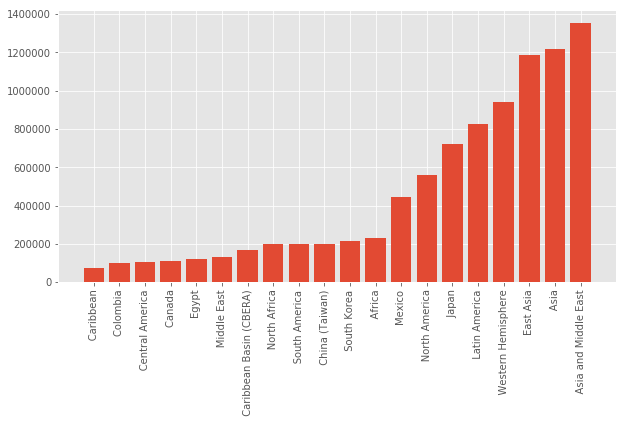

In [70]:
plt.bar(df_corn_exp_by_country_region['slno'], df_corn_exp_by_country_region['amount'])
plt.xticks(rotation=90)

In [17]:
df_asiaME = df_corn_exp_imp[df_corn_exp_imp['exportedTo'] == "Asia and Middle East"]

KeyError: 'exportedTo'

In [100]:
df_asiaME_yearly = df_asiaME[df_asiaME['frequency'] == "Annual"]

In [16]:
df_world_yearly = df_world_yearly[['year', 'amount']]
df_world_yearly['year'] = df_world_yearly['year'].apply(int)
df_world_yearly['amount'] = df_world_yearly['amount'].apply(float)
df_world_yearly['amount'] = df_world_yearly['amount']/100000

NameError: name 'df_world_yearly' is not defined

In [15]:
df_asiaME_yearly = df_asiaME_yearly[['year', 'amount']]
df_asiaME_yearly['year'] = df_asiaME_yearly['year'].apply(int)
df_asiaME_yearly['amount'] = df_asiaME_yearly['amount'].apply(float)
df_asiaME_yearly['amount'] = df_asiaME_yearly['amount']/100000

NameError: name 'df_asiaME_yearly' is not defined

In [14]:
df_world_yearly = df_world_yearly.iloc[:29]
df_asiaME_yearly = df_asiaME_yearly.iloc[:29]
df_asiaME_imp_yearly = df_asiaME_yearly.iloc[29:]

NameError: name 'df_world_yearly' is not defined

NameError: name 'df_world_yearly' is not defined

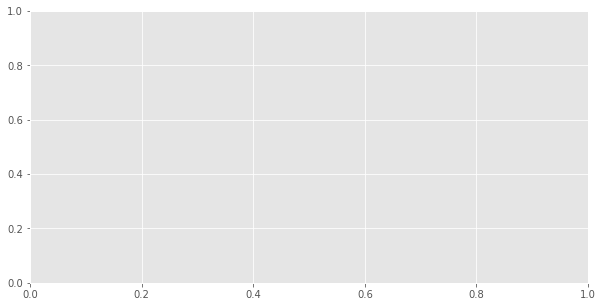

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
list_lines = []
list_lines, = ax.plot(df_world_yearly['year'], df_world_yearly['amount'])
ax.plot(df_asiaME_yearly['year'], df_asiaME_yearly['amount'])


In [105]:
df_asiaME_yearly

,year,amount
